In [1]:
import pandas as pd
%matplotlib inline
import pynbody

import numpy as np
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
h = 0.6776942783267969
# pd.set_option("display.max_rows", None, "display.max_columns", None)

from tangos_halo_module.halo_properties import velocity_angles, track_halo_property, get_timesteps, ID_to_sim_halo_snap, infall_final_n_particles, infall_final_coordinates, apocentric_distance, disruption_time, accretion_time, orbit_interpolation, infall_velocity, quenching_time, max_sSFR_time, max_mass_time 
from tangos_halo_module.path import get_file_path, get_halo_snap_num, read_file
from tangos_halo_module.halos import ID_to_tangos_halo, get_survivors, get_main_progenitor_branch, get_zombies, get_host, get_survivor_IDs, get_zombie_IDs, blockPrint, enablePrint, tangos_to_pynbody_halo

In [16]:
sim='h329'
snapnum='4096'
if sim == 'h148':
    snapshot = pynbody.load("/home/pathakde/Sims/"+ str(sim) + ".cosmo50PLK.3072g/"
                            + str(sim) + ".cosmo50PLK.3072g3HbwK1BH/snapshots/"
                            + str(sim) + ".cosmo50PLK.3072g3HbwK1BH.00"+ str(snapnum))
else:
    snapshot = pynbody.load("/home/pathakde/Sims/"+ str(sim) + ".cosmo50PLK.3072g/"
                            + str(sim) + ".cosmo50PLK.3072gst5HbwK1BH/snapshots/"
                            + str(sim) + ".cosmo50PLK.3072gst5HbwK1BH.00"+ str(snapnum))
snapshot.physical_units()
all_halos = snapshot.halos()
host=all_halos[1]
pynbody.analysis.angmom.faceon(host)

In [3]:
# data=pd.DataFrame()

/home/pathakde/anaconda3/envs/conda-env-py3/lib/python3.6/site-packages/pynbody-1.0.2-py3.6-linux-x86_64.egg/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]
/home/pathakde/anaconda3/envs/conda-env-py3/lib/python3.6/site-packages/pynbody-1.0.2-py3.6-linux-x86_64.egg/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]
/home/pathakde/anaconda3/envs/conda-env-py3/lib/python3.6/site-packages/pynbody-1.0.2-py3.6-linux-

Text(0, 0.5, '$\\rho_{GAS}$ [M$_{\\odot}$ kpc$^{-3}$]')

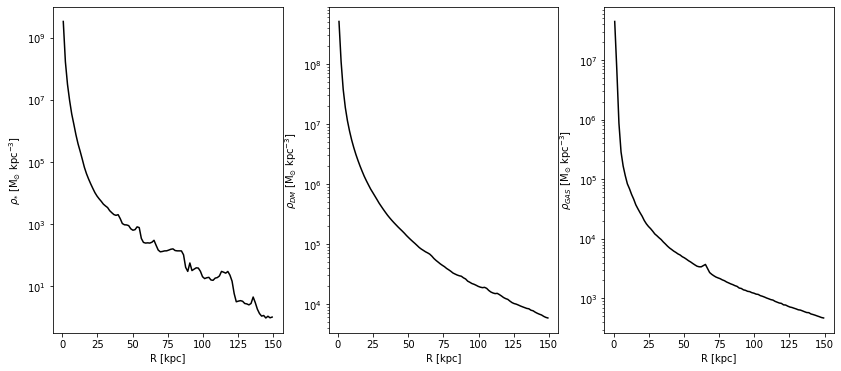

In [17]:
# make the figure and sub plots
f, axs = plt.subplots(1,3,figsize=(14,6))

p = pynbody.analysis.profile.Profile(host.s, vmin =.01, max=150, ndim=3)
data[str(sim)+'_s_rbins']=p['rbins']
data[str(sim)+'_s_density']=p['density']
data[str(sim)+'_s_mass']=p['mass']

# make the plot
axs[0].plot(p['rbins'],p['density'], 'k')
axs[0].semilogy()
axs[0].set_xlabel('R [kpc]')
axs[0].set_ylabel(r'$\rho_{*}$ [M$_{\odot}$ kpc$^{-3}$]')

# make a 3D density plot of the dark matter (note ndim=3 in the constructor below)
p = pynbody.analysis.profile.Profile(host.d, min=.01, max=150, ndim=3)
data[str(sim)+'_d_rbins']=p['rbins']
data[str(sim)+'_d_density']=p['density']
data[str(sim)+'_d_mass']=p['mass']

axs[1].plot(p['rbins'],p['density'], 'k')
axs[1].semilogy()
axs[1].set_xlabel('R [kpc]')
axs[1].set_ylabel(r'$\rho_{DM}$ [M$_{\odot}$ kpc$^{-3}$]')

p = pynbody.analysis.profile.Profile(host.g, min=.01, max=150, ndim=3)
data[str(sim)+'_g_rbins']=p['rbins']
data[str(sim)+'_g_density']=p['density']
data[str(sim)+'_g_mass']=p['mass']

axs[2].plot(p['rbins'],p['density'], 'k')
axs[2].semilogy()
axs[2].set_xlabel('R [kpc]')
axs[2].set_ylabel(r'$\rho_{GAS}$ [M$_{\odot}$ kpc$^{-3}$]')

In [18]:
data

,h148_s_rbins,h148_s_density,h148_s_mass,h148_d_rbins,h148_d_density,h148_d_mass,h148_g_rbins,h148_g_density,h148_g_mass,h229_s_rbins,...,h242_g_mass,h329_s_rbins,h329_s_density,h329_s_mass,h329_d_rbins,h329_d_density,h329_d_mass,h329_g_rbins,h329_g_density,h329_g_mass
0,0.750039,4.417077e+09,6.244975e+10,0.75995,6.278274e+08,9.052599e+09,0.75995,2.761789e+07,3.982204e+08,0.750025,...,1.916994e+08,0.750684,3.385279e+09,4.792342e+10,0.75995,5.132697e+08,7.400800e+09,0.75995,4.448179e+07,6.413798e+08
1,2.250038,2.566478e+08,2.539874e+10,2.25985,1.355042e+08,1.352202e+10,2.25985,6.966949e+06,6.952345e+08,2.250025,...,2.938070e+08,2.250677,1.708334e+08,1.691543e+10,2.25985,1.099723e+08,1.097417e+10,2.25985,6.830871e+06,6.816552e+08
2,3.750038,4.883497e+07,1.311763e+10,3.75975,4.910659e+07,1.325720e+10,3.75975,3.501682e+06,9.453417e+08,3.750024,...,3.699981e+08,3.750670,3.196947e+07,8.590186e+09,3.75975,3.774077e+07,1.018879e+10,3.75975,8.730913e+05,2.357066e+08
3,5.250037,2.349976e+07,1.229231e+10,5.25965,2.688412e+07,1.411286e+10,5.25965,2.919450e+06,1.532569e+09,5.250024,...,5.369688e+08,5.250663,9.689485e+06,5.069577e+09,5.25965,1.887203e+07,9.906897e+09,5.25965,2.871263e+05,1.507273e+08
4,6.750037,1.280421e+07,1.104205e+10,6.75955,1.715861e+07,1.483775e+10,6.75955,2.425736e+06,2.097633e+09,6.750024,...,6.942935e+08,6.750656,3.560408e+06,3.070960e+09,6.75955,1.139890e+07,9.857095e+09,6.75955,1.666790e+05,1.441342e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,143.250002,1.376131e+01,5.322969e+06,143.25045,2.101605e+04,8.128665e+09,143.25045,1.985053e+03,7.677859e+08,143.250001,...,2.668506e+08,143.250031,1.143134e+00,4.421706e+05,143.25045,6.793055e+03,2.627443e+09,143.25045,5.221825e+02,2.019717e+08
96,144.750001,1.249452e+01,4.934709e+06,144.75035,2.055841e+04,8.119044e+09,144.75035,1.938770e+03,7.656698e+08,144.750001,...,2.657977e+08,144.750024,9.523528e-01,3.761302e+05,144.75035,6.596019e+03,2.604937e+09,144.75035,5.067944e+02,2.001461e+08
97,146.250001,1.000837e+01,4.035151e+06,146.25025,1.978818e+04,7.977650e+09,146.25025,1.894276e+03,7.636820e+08,146.250001,...,2.604164e+08,146.250017,1.083089e+00,4.366757e+05,146.25025,6.262509e+03,2.524745e+09,146.25025,4.928145e+02,1.986793e+08
98,147.750001,8.776488e+00,3.611441e+06,147.75015,1.911765e+04,7.866222e+09,147.75015,1.861589e+03,7.659767e+08,147.750000,...,2.633198e+08,147.750010,9.640522e-01,3.966966e+05,147.75015,6.018268e+03,2.476300e+09,147.75015,4.774818e+02,1.964665e+08


In [20]:
data.to_csv('MilkyWay_DensityProfiles.csv', index=False)